In [4]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from traffic.core import Traffic

#with open('', 'rb') as f:
#df_original = Traffic.from_file('./ecmwf_2019_10_to_2019_10.pkl')
with open('./ecmwf_2019_10_to_2019_10.pkl', "rb") as f:
    df_original = pickle.load(f)
#df_2 = Traffic.from_file('./other_features_200.pkl')
#df_original = df_original + df_2
import pandas as pd
import numpy as np
from geopy.distance import geodesic

In [19]:
df_original.loc['2019-10-02 09:00:00']

u_component_of_wind  v_component_of_wind  \
level latitude longitude                                             
150   45.0     4.50                 11.158676           -13.391395   
               4.75                 11.471520           -12.895473   
               5.00                 11.963133           -12.406141   
               5.25                 12.538543           -11.803127   
               5.50                 13.004085           -10.921672   
...                                       ...                  ...   
1000  52.5     9.75                  3.206953            -1.044289   
               10.00                 3.169056            -0.997931   
               10.25                 3.257167            -1.078848   
               10.50                 3.430546            -1.267655   
               10.75                 3.562238            -1.452247   

                          vertical_velocity  temperature  total_cloud_cover  \
level latitude longitude                                                      
150   45.0     4.50               -0.077486   218.572296           0.489997   
               4.75               -0.086096   218.361237           0.355897   
               5.00               -0.061191   218.194275           0.359254   
               5.25               -0.004967   218.163544           0.619993   
               5.50                0.047213   218.287781           0.469702   
...                                     ...          ...                ...   
1000  52.5     9.75                0.013481   283.220276           0.237880   
               10.00               0.007349   283.286072           0.243770   
               10.25               0.003311   283.311371           0.240902   
               10.50               0.010639   283.225342           0.288755   
               10.75               0.020360   283.079834           0.320983   

                          total_precipitation  total_column_water_vapour  \
level latitude longitude                                                   
150   45.0     4.50                  0.000012                  14.963057   
               4.75                  0.000060                  17.847399   
               5.00                  0.000087                  18.890490   
               5.25                  0.000104                  16.834387   
               5.50                  0.000281                  14.495760   
...                                       ...                        ...   
1000  52.5     9.75                  0.000038                  11.736029   
               10.00                 0.000038                  11.802633   
               10.25                 0.000040                  11.798336   
               10.50                 0.000033                  11.826265   
               10.75                 0.000042                  11.939062   

                          specific_humidity  10m_u_component_of_wind  \
level latitude longitude                                               
150   45.0     4.50                0.000004                 2.808895   
               4.75                0.000004                 0.611339   
               5.00                0.000004                -0.417163   
               5.25                0.000004                 0.238115   
               5.50                0.000004                 0.951324   
...                                     ...                      ...   
1000  52.5     9.75                0.006384                 3.743379   
               10.00               0.006385                 3.858290   
               10.25               0.006396                 3.984597   
               10.50               0.006181                 4.083364   
               10.75               0.006063                 4.184030   

                          10m_v_component_of_wind  
level latitude longitude                           
150   45.0     4.50                     -4.890068  
     

In [30]:
import logging

# Enable logging
logging.basicConfig(level=logging.INFO)

In [20]:
import xarray
era5 = xarray.open_zarr(
    "gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2",
    chunks={'time': 48},
    consolidated=True,
)
era5

<xarray.Dataset> Size: 534TB
Dimensions:                                           (time: 552264,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 37)
Coordinates:
  * latitude                                          (latitude) float32 3kB ...
  * level                                             (level) int64 296B 1 .....
  * longitude                                         (longitude) float32 6kB ...
  * time                                              (time) datetime64[ns] 4MB ...
Data variables: (12/31)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    geopotential                                      (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    ...                                                ...
    total_precipitation                               (time, latitude, longitude) float32 2TB dask.array<chunksize=(48, 721, 1440), meta=np.ndarray>
    type_of_high_vegetation                           (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    type_of_low_vegetation                            (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    u_component_of_wind                               (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    v_component_of_wind                               (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>
    vertical_velocity                                 (time, level, latitude, longitude) float32 85TB dask.array<chunksize=(48, 37, 721, 1440), meta=np.ndarray>

In [61]:
import numpy as np
subset = era5.sel(time=slice('2020-01-01 01:00:00', '2020-01-01 03:00:00'), latitude=slice(64.0, 38.0), 
                  longitude=slice(0.0, 20.0))
subset = subset[['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature','temperature',
                  'vertical_velocity', 'v_component_of_wind', 'u_component_of_wind'
                 #'geopotential', 
                 #'specific_humidity',  'total_cloud_cover', 'total_precipitation', 'total_column_water_vapour', 
                ]]
subset

<xarray.Dataset> Size: 25MB
Dimensions:                  (time: 3, latitude: 105, longitude: 129, level: 37)
Coordinates:
  * latitude                 (latitude) float32 420B 64.0 63.75 ... 38.25 38.0
  * level                    (level) int64 296B 1 2 3 5 7 ... 925 950 975 1000
  * longitude                (longitude) float32 516B 0.0 0.25 ... 359.5 359.8
  * time                     (time) datetime64[ns] 24B 2020-01-01T01:00:00 .....
Data variables:
    10m_u_component_of_wind  (time, latitude, longitude) float32 163kB dask.array<chunksize=(3, 105, 129), meta=np.ndarray>
    10m_v_component_of_wind  (time, latitude, longitude) float32 163kB dask.array<chunksize=(3, 105, 129), meta=np.ndarray>
    2m_temperature           (time, latitude, longitude) float32 163kB dask.array<chunksize=(3, 105, 129), meta=np.ndarray>
    temperature              (time, level, latitude, longitude) float32 6MB dask.array<chunksize=(3, 37, 105, 129), meta=np.ndarray>
    vertical_velocity        (time, level, latitude, longitude) float32 6MB dask.array<chunksize=(3, 37, 105, 129), meta=np.ndarray>
    v_component_of_wind      (time, level, latitude, longitude) float32 6MB dask.array<chunksize=(3, 37, 105, 129), meta=np.ndarray>
    u_component_of_wind      (time, level, latitude, longitude) float32 6MB dask.array<chunksize=(3, 37, 105, 129), meta=np.ndarray>

In [62]:
subset.to_netcdf('era5_subset_2020_test_4.nc')

In [63]:
ds = xarray.open_dataset('era5_subset_2020_test_4.nc')

# Inspect the dataset
dssub = ds.sel(time='2020-01-01 01:00:00')

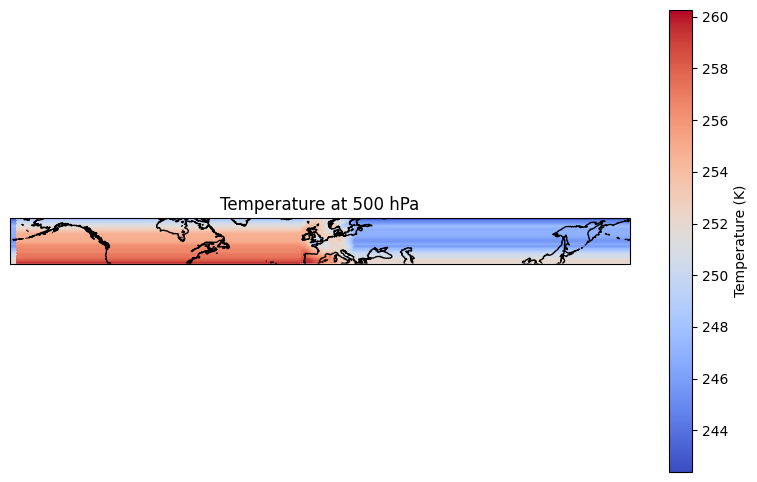

In [64]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Assuming you already have the dataset loaded
# ds = xr.open_zarr(...)

# Select the temperature at a specific pressure level, e.g., level 500 hPa
temperature_level = dssub['temperature'].sel(level=500)

# Plotting the data on a map
plt.figure(figsize=(10, 6))

# Create a Cartopy projection for plotting (PlateCarree is the most common)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the temperature data
temperature_level.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Temperature (K)'})

# Add coastlines for context
ax.coastlines()

# Show the plot
plt.title('Temperature at 500 hPa')
plt.show()